In [1]:
!pip install opendatasets
!pip install split-folders

In [2]:
import opendatasets as op

url = 'https://www.kaggle.com/datasets/arjuntejaswi/plant-village'

op.download(url)

100%|██████████| 329M/329M [00:03<00:00, 88.8MB/s]


In [3]:
import os

os.makedirs('PlantVillage')

In [4]:
import shutil

src = '/content/plant-village/PlantVillage/Tomato_Bacterial_spot'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Early_blight'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Late_blight'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Leaf_Mold'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Septoria_leaf_spot'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato__Target_Spot'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato__Tomato_mosaic_virus'
des = '/content/PlantVillage'
shutil.move(src, des)
src = '/content/plant-village/PlantVillage/Tomato_healthy'
des = '/content/PlantVillage'
shutil.move(src, des)

'/content/PlantVillage/Tomato_healthy'

In [5]:
!split_folders --output dataset --ratio 0.7 0.1 0.2 -- PlantVillage

Copying files: 16012 files [00:02, 5502.28 files/s]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Data augmentation
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rotation_range=10,
                              horizontal_flip=True
                              )

In [8]:
# Training
train_generator = data_gen.flow_from_directory('/content/dataset/train',
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )

Found 11203 images belonging to 10 classes.


In [9]:
# Validation
validation_generator = data_gen.flow_from_directory('/content/dataset/val',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical'
                                                    )

Found 1597 images belonging to 10 classes.


In [10]:
# Testing
test_generator = data_gen.flow_from_directory('/content/dataset/test',
                                                target_size=(256, 256),
                                                batch_size=32,
                                                class_mode='categorical'
                                                    )


Found 3211 images belonging to 10 classes.


**Building CNN**

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_generator,
          validation_data=validation_generator,
          epochs=10,
          steps_per_epoch=len(train_generator),
          validation_steps=len(validation_generator),
          verbose=1)

Epoch 1/10
351/351 [==============================] - 210s 553ms/step - loss: 1.5904 - accuracy: 0.4335 - val_loss: 1.1160 - val_accuracy: 0.6230
Epoch 2/10
351/351 [==============================] - 190s 541ms/step - loss: 0.9948 - accuracy: 0.6568 - val_loss: 0.9724 - val_accuracy: 0.6662
Epoch 3/10
351/351 [==============================] - 187s 532ms/step - loss: 0.7305 - accuracy: 0.7461 - val_loss: 0.6018 - val_accuracy: 0.7896
Epoch 4/10
351/351 [==============================] - 184s 525ms/step - loss: 0.5615 - accuracy: 0.8057 - val_loss: 0.5951 - val_accuracy: 0.7965
Epoch 5/10
351/351 [==============================] - 183s 522ms/step - loss: 0.4908 - accuracy: 0.8275 - val_loss: 0.4828 - val_accuracy: 0.8397
Epoch 6/10
351/351 [==============================] - 186s 531ms/step - loss: 0.4344 - accuracy: 0.8489 - val_loss: 0.3961 - val_accuracy: 0.8647
Epoch 7/10
351/351 [==============================] - 184s 524ms/step - loss: 0.3701 - accuracy: 0.8705 - val_loss: 0.4566 -

In [15]:
# Evaluate
loss, accuracy = model.evaluate(test_generator)

101/101 [==============================] - 45s 439ms/step - loss: 0.2931 - accuracy: 0.9144


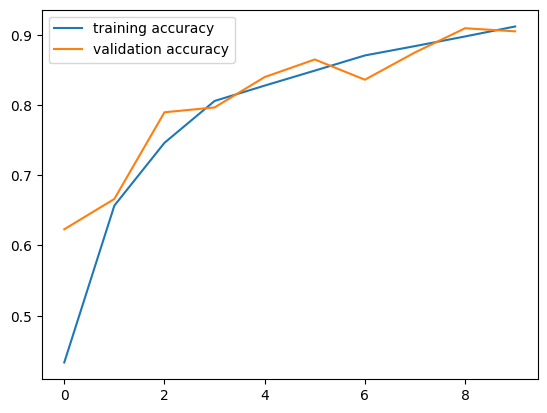

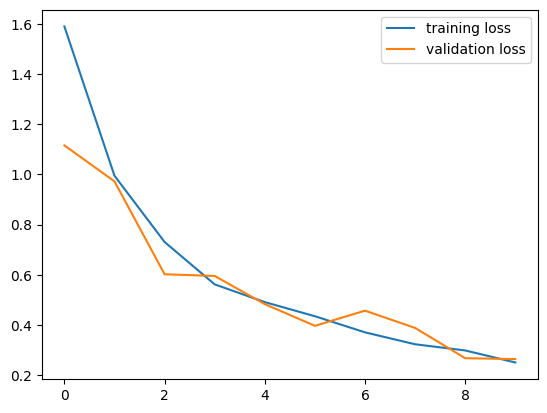

In [16]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Plot the loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [17]:
model.save('tomato_disease.h5')

**Make Single prediction**

In [24]:
from keras.utils import load_img, img_to_array

#Image paht
img_path = '/content/PlantVillage/Tomato_Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG'

# load image
img = load_img(img_path, target_size=(256, 256))

# convert image into areay
img_array = img_to_array(img)

# Normalize pixel values to [0, 1]
img = img_array/255

# Add batch dimension
img = np.expand_dims(img, axis=0)

prediction  = model.predict(img)

class_labels = ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold',
                'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite',
                'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus',
                'Tomato_healthy']
pred_index = np.argmax(prediction)
confidence = prediction[0][pred_index]

predicted_class = class_labels[pred_index]

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2%}")

1/1 [==============================] - 0s 24ms/step
Predicted class: Tomato_Early_blight
Confidence: 98.22%
